In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
import warnings

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
df_train=pd.read_csv("/content/sign_mnist_train.csv")

In [ ]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [ ]:
y_train = df_train['label']
df_train.drop(['label'], axis=1, inplace=True)
df_train.head(-5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,155,157,156,156,156,157,156,158,158,157,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,187,188,188,187,187,186,187,188,187,186,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,211,211,212,212,211,210,211,210,210,211,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,164,167,170,172,176,179,180,184,185,186,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,127,129,130,130,129,130,131,130,130,129,...,44.0,147.0,148.0,144.0,142.0,140.0,139.0,136.0,134.0,133.0
2063,190,192,193,194,195,197,198,197,198,199,...,230.0,229.0,229.0,230.0,229.0,220.0,175.0,122.0,95.0,96.0
2064,79,84,88,96,108,117,123,126,133,137,...,67.0,107.0,96.0,96.0,95.0,94.0,94.0,93.0,93.0,88.0
2065,76,84,91,100,107,115,122,127,128,133,...,211.0,204.0,210.0,212.0,215.0,215.0,215.0,217.0,217.0,218.0


In [ ]:
df_test = pd.read_csv('/content/sign_mnist_test.csv')
df_test.head(-5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,5,126,128,131,132,133,134,135,135,136,...,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0
2,10,85,88,92,96,105,123,135,143,147,...,68.0,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0
3,0,203,205,207,206,207,209,210,209,210,...,154.0,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0
4,3,188,191,193,195,199,201,202,203,203,...,26.0,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,5,138,145,149,151,157,163,167,171,174,...,120.0,114.0,114.0,113.0,112.0,112.0,109.0,116.0,198.0,240.0
3098,5,88,94,97,99,105,110,113,117,119,...,72.0,66.0,66.0,66.0,65.0,65.0,62.0,68.0,140.0,177.0
3099,23,130,133,135,140,143,146,150,151,152,...,190.0,192.0,192.0,192.0,191.0,191.0,189.0,188.0,187.0,186.0
3100,1,90,95,97,100,104,110,112,112,114,...,138.0,208.0,199.0,201.0,201.0,199.0,200.0,199.0,198.0,198.0


In [ ]:
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
df_test.head(-5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,126,128,131,132,133,134,135,135,136,138,...,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0
2,85,88,92,96,105,123,135,143,147,152,...,68.0,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0
3,203,205,207,206,207,209,210,209,210,209,...,154.0,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0
4,188,191,193,195,199,201,202,203,203,203,...,26.0,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,138,145,149,151,157,163,167,171,174,176,...,120.0,114.0,114.0,113.0,112.0,112.0,109.0,116.0,198.0,240.0
3098,88,94,97,99,105,110,113,117,119,122,...,72.0,66.0,66.0,66.0,65.0,65.0,62.0,68.0,140.0,177.0
3099,130,133,135,140,143,146,150,151,152,154,...,190.0,192.0,192.0,192.0,191.0,191.0,189.0,188.0,187.0,186.0
3100,90,95,97,100,104,110,112,112,114,115,...,138.0,208.0,199.0,201.0,201.0,199.0,200.0,199.0,198.0,198.0


In [ ]:
size  = 28
channels = 1
batch = 128
epochs = 100

In [ ]:
X_train = df_train.values.reshape(df_train.shape[0], size, size, channels)
X_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (2072, 28, 28, 1)
X_test shape: (3107, 28, 28, 1)


In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=True)

datagenRescale = ImageDataGenerator(rescale=1./255)

X_train = datagen.flow(X_train, y_train, batch_size=batch)

X_test = datagenRescale.flow(X_test, y_test)

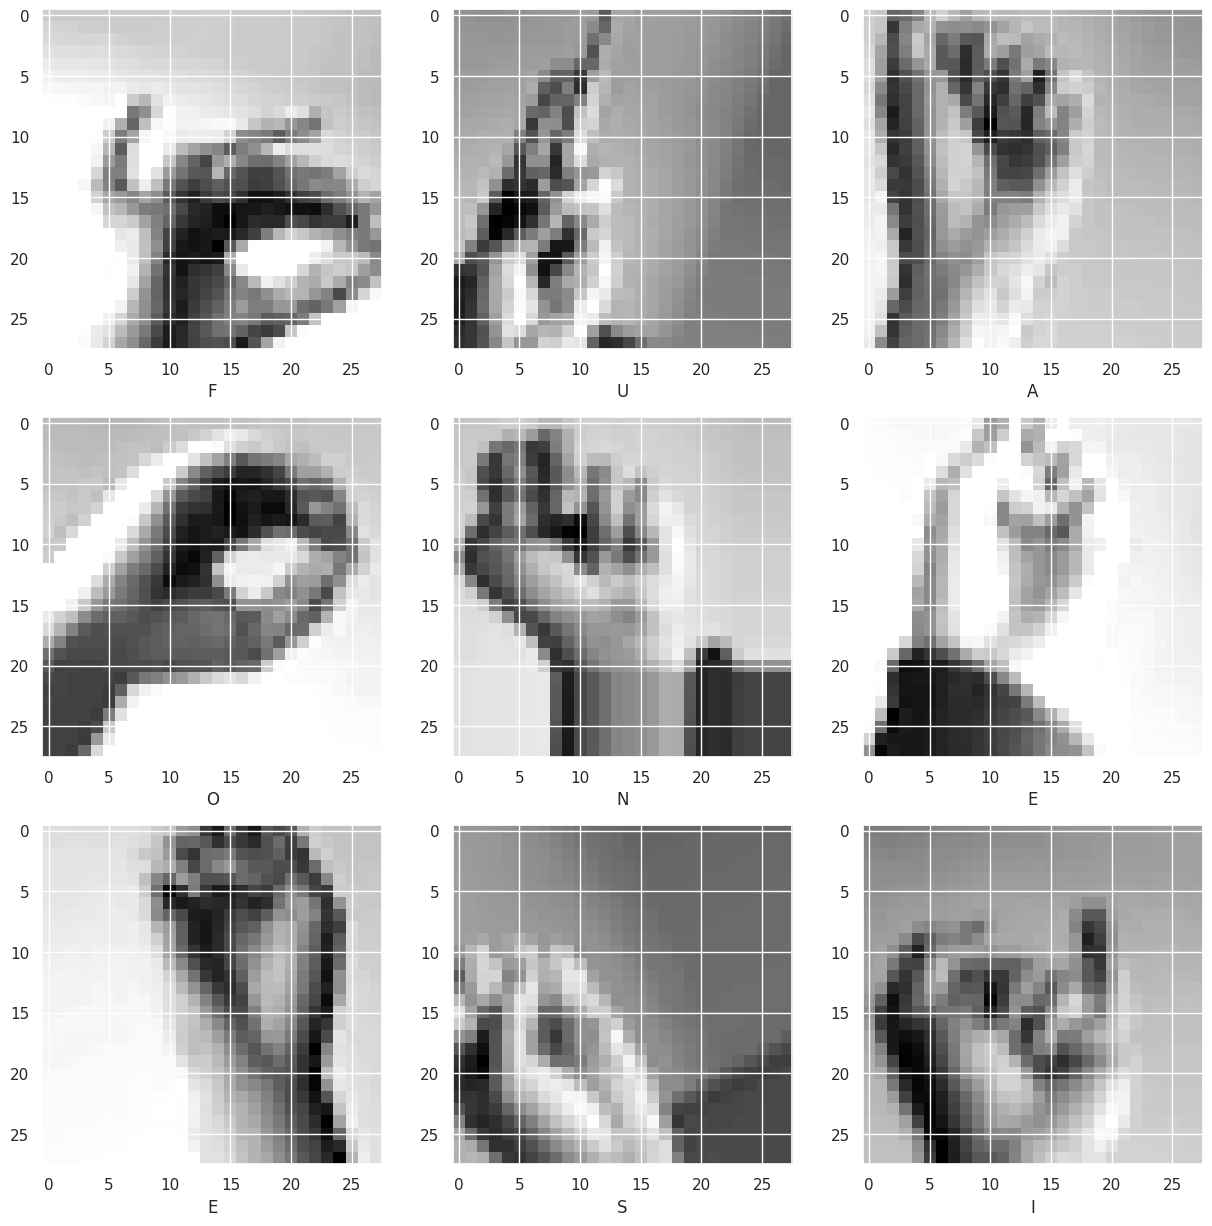

In [ ]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in X_train:
        image = X_batch[i]
        plt.imshow(image, cmap='gray')
        plt.xlabel(alphabet[Y_batch[i]])
        break
plt.show()

In [ ]:
checkpoint_filepath = 'best_model.hdf5'

callback_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_accuracy', mode='max', save_best_only=True)
callback_learningrate = ReduceLROnPlateau(monitor='loss', mode='min', min_delta=0.01, patience=3, factor=.75, min_lr=0.00001, verbose=1)

callbacks = [callback_checkpoint, callback_learningrate]

In [ ]:
Model = Sequential([Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(size,size,channels)),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),

                    Conv2D(filters=128,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),

                    Conv2D(filters=512, kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),


                    Flatten(),

                    Dense(units=4096, activation="relu"),
                    Dropout(0.2),Flatten(),

                    Dense(units=4096, activation="relu"),
                    Dropout(0.2),

                    Dense(units=1024, activation="relu"),
                    Dropout(0.2),

                    Dense(units=256, activation="relu"),
                    Dropout(0.2),

                    Dense(units=25, activation="softmax"),
])


Model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])


Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [ ]:
history = Model.fit(X_train, validation_data=X_test, epochs=20, callbacks=callbacks)

Epoch 1/20
17/17 [==============================] - 37s 2s/step - loss: 3.2186 - accuracy: 0.0425 - val_loss: nan - val_accuracy: 0.0303 - lr: 0.0010
Epoch 2/20
17/17 [==============================] - 35s 2s/step - loss: 3.1980 - accuracy: 0.0487 - val_loss: nan - val_accuracy: 0.0225 - lr: 0.0010
Epoch 3/20
17/17 [==============================] - 38s 2s/step - loss: 3.1907 - accuracy: 0.0458 - val_loss: nan - val_accuracy: 0.0360 - lr: 0.0010
Epoch 4/20
17/17 [==============================] - 35s 2s/step - loss: 3.1835 - accuracy: 0.0516 - val_loss: nan - val_accuracy: 0.0225 - lr: 0.0010
Epoch 5/20
17/17 [==============================] - 35s 2s/step - loss: 3.1571 - accuracy: 0.0579 - val_loss: nan - val_accuracy: 0.0225 - lr: 0.0010
Epoch 6/20
17/17 [==============================] - 37s 2s/step - loss: 3.0791 - accuracy: 0.0695 - val_loss: nan - val_accuracy: 0.0669 - lr: 0.0010
Epoch 7/20
17/17 [==============================] - 37s 2s/step - loss: 3.0582 - accuracy: 0.0758 - 

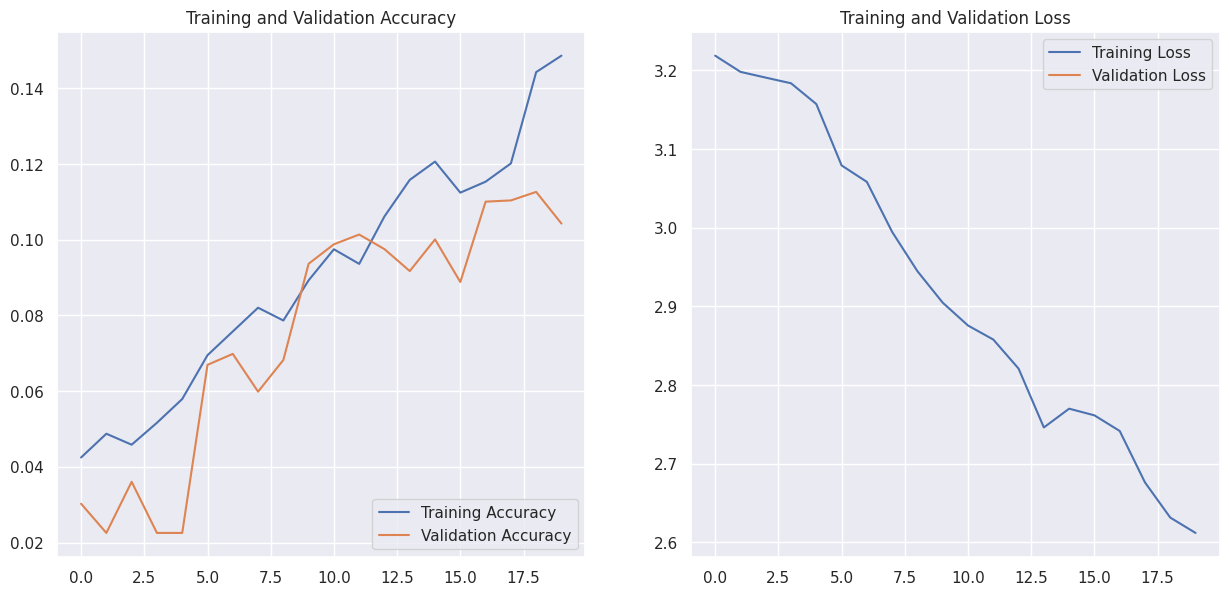

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
score = Model.evaluate(X_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

98/98 [==============================] - 8s 85ms/step - loss: nan - accuracy: 0.1043
Test loss: nan
Test accuracy: 0.10428065806627274


In [ ]:
df_test = pd.read_csv('/content/sign_mnist_test.csv')
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
X_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

In [ ]:
y_pred = np.argmax(Model.predict(X_test),axis = 1)


225/225 [==============================] - 19s 84ms/step


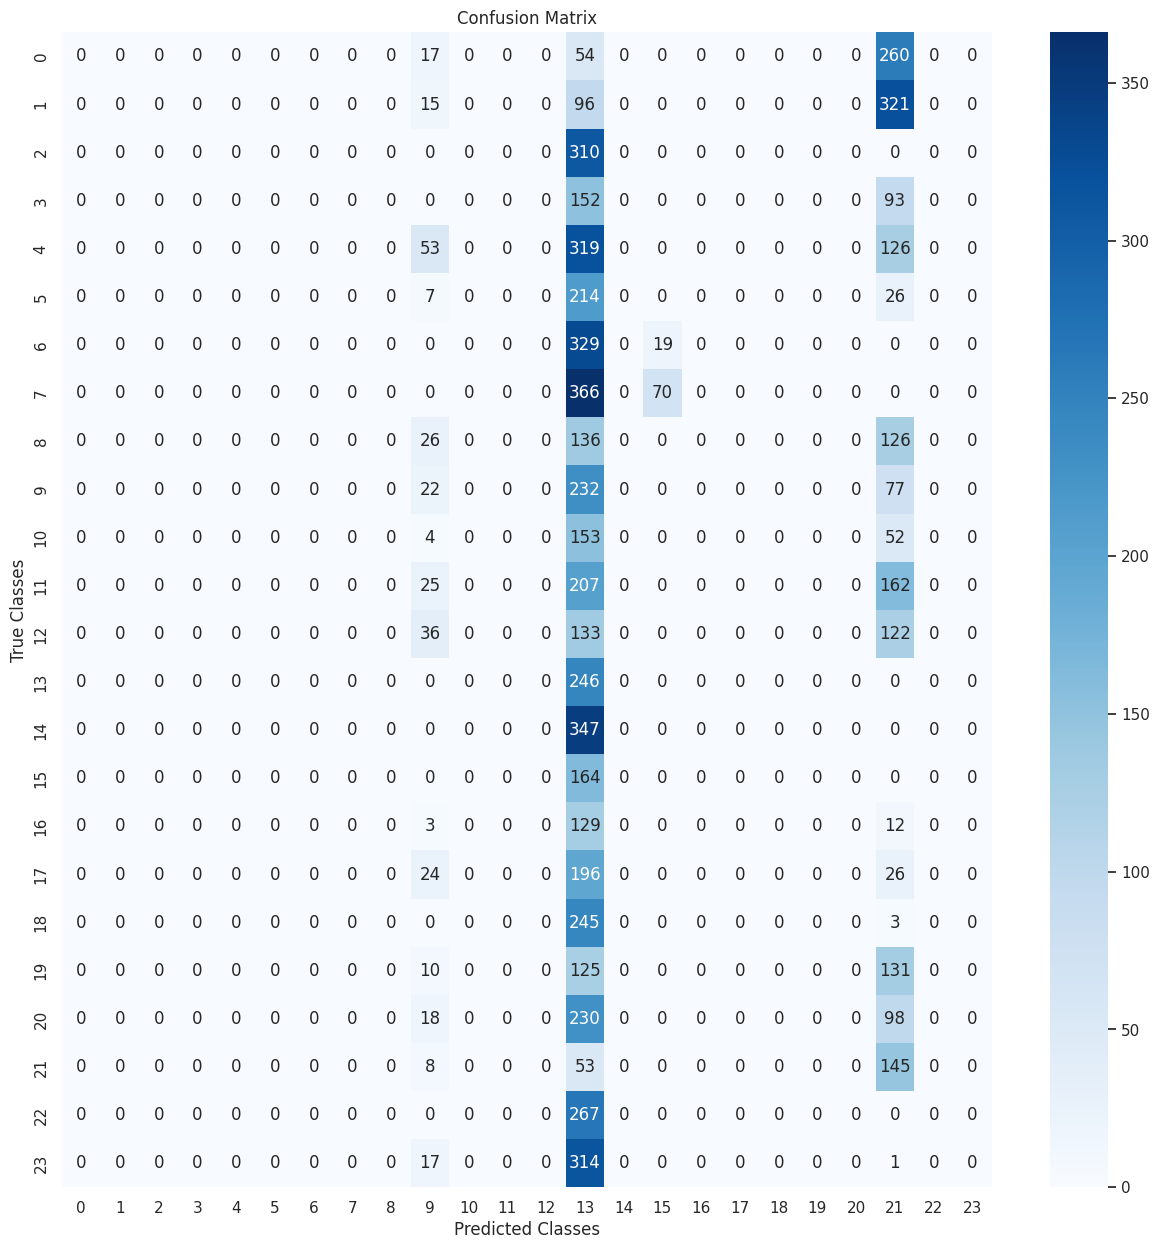

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (15,15))
sns.heatmap(CM, annot=True, cmap="Blues", fmt = 'g')
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.show()

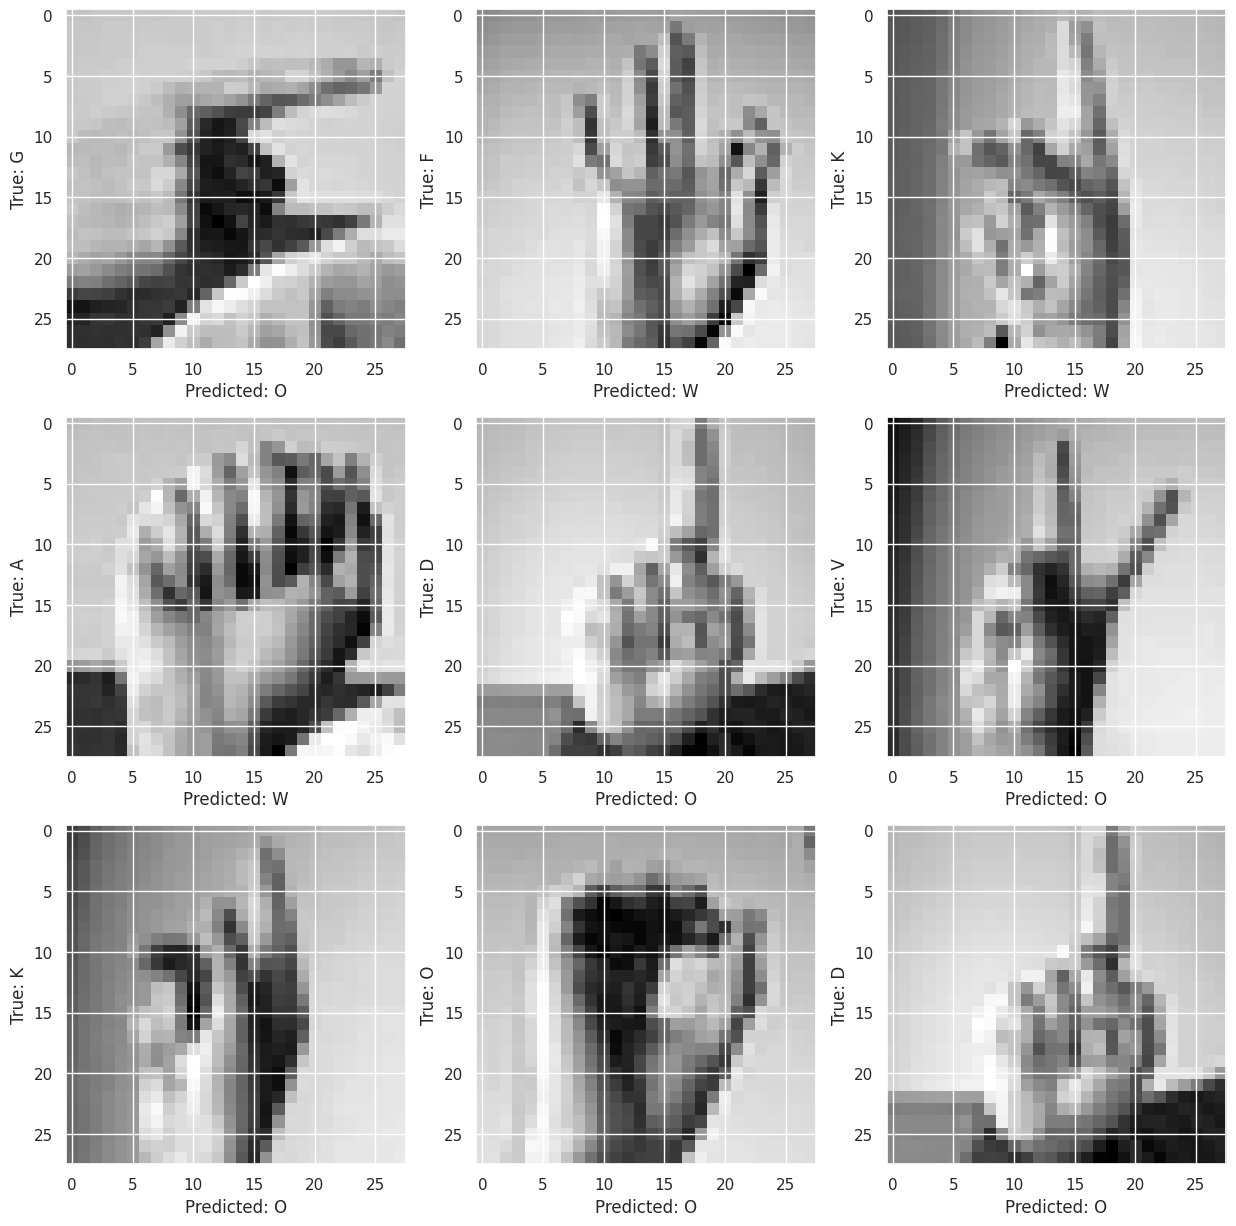

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.ylabel(f"True: {alphabet[y_test[i]]}")
    plt.xlabel(f"Predicted: {alphabet[y_pred[i]]}")

plt.show()